In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
dataset=pd.read_csv('29-bestsellers_with_categories.csv')

In [92]:
missing_data=dataset.isnull().sum()
print("missing data:\n",missing_data)

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [93]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [94]:
# Select numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

# Find rows where any numeric column has value zero
zero_rows = dataset[(dataset[numeric_cols] == 0).any(axis=1)]

# Print the rows
zero_rows.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction


In [95]:
# Remove rows from dataset where any numeric column has value zero
dataset = dataset[(dataset[numeric_cols] != 0).all(axis=1)]
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [96]:
# Group by Name and Author, keep average rating and price, max reviews, etc., and include latest Year
dataset = dataset.groupby(['Name', 'Author']).agg({
    'User Rating': 'mean',
    'Reviews': 'max',
    'Price': 'mean',
    'Year': 'max',
    'Genre': 'first',
}).reset_index()

In [97]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


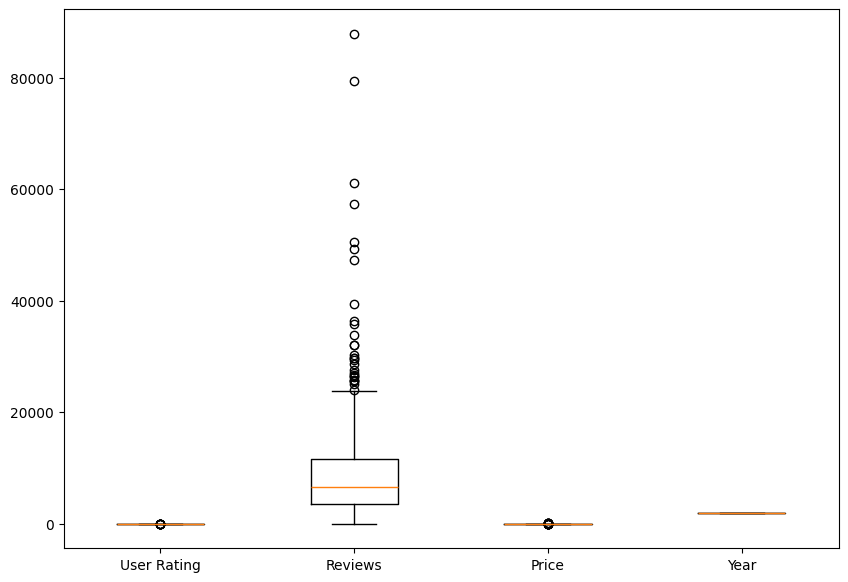

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [99]:
Q1 = dataset['Reviews'].quantile(0.25)
Q3 = dataset['Reviews'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for Reviews:", IQR)

Interquartile Range (IQR) for Reviews: 8162.5


In [100]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers in 'Reviews'
filtered_dataset = dataset[(dataset['Reviews'] >= lower_bound) & (dataset['Reviews'] <= upper_bound)]
filtered_dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


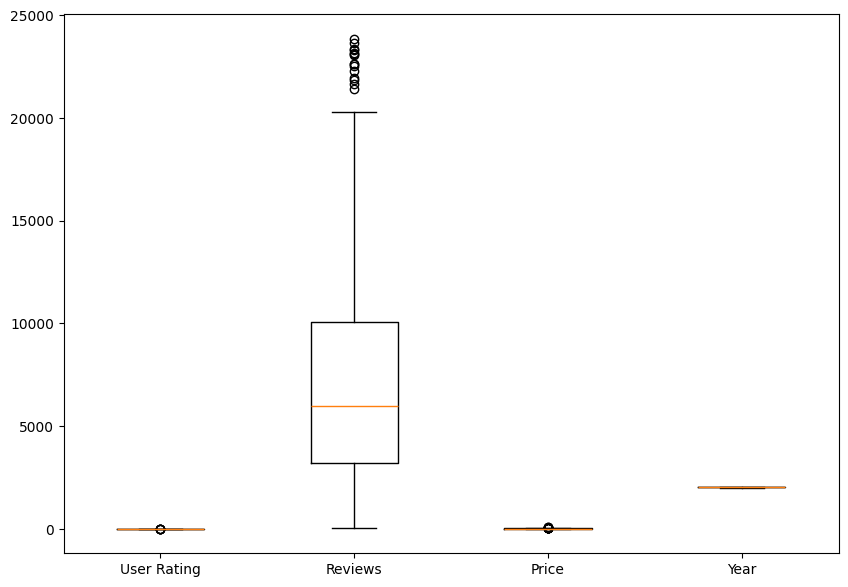

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = filtered_dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

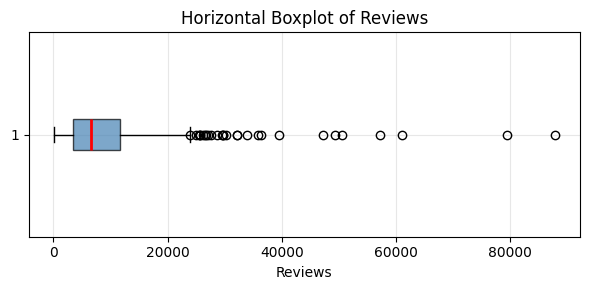

In [102]:
plt.figure(figsize=(6, 3))
plt.boxplot(dataset['Reviews'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='steelblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.xlabel('Reviews')
plt.title('Horizontal Boxplot of Reviews')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [103]:
filtered_dataset = filtered_dataset.drop(columns=['Name'])
print("Dropped 'Name' column from both dataset and filtered_dataset.")

Dropped 'Name' column from both dataset and filtered_dataset.


In [104]:
missing_data=filtered_dataset.isnull().sum()
print("missing data:\n",missing_data)
filtered_dataset.head()

missing data:
 Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,Stephen King,4.6,2052,22.0,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,George Orwell,4.7,21424,6.0,2017,Fiction
4,National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


In [105]:
import category_encoders as ce

# Select columns to encode and the target
cols_to_encode = ['Author']
target = 'User Rating'

# Make sure we have a copy, not a view, of the dataset
filtered_dataset = filtered_dataset.copy()

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

# Fit and transform the filtered_dataset
filtered_dataset[cols_to_encode] = encoder.fit_transform(filtered_dataset[cols_to_encode], filtered_dataset[target])

# Ensure the encoded columns are float64
for col in cols_to_encode:
    filtered_dataset[col] = filtered_dataset[col].astype('float64')

print("Filtered dataset after encoding:")
print(filtered_dataset.head())

Filtered dataset after encoding:
     Author  User Rating  Reviews  Price  Year        Genre
0  4.625004          4.7    17350    8.0  2016  Non Fiction
1  4.598872          4.6     2052   22.0  2011      Fiction
2  4.625004          4.7    18979   15.0  2018  Non Fiction
3  4.625004          4.7    21424    6.0  2017      Fiction
4  4.638015          4.8     7665   12.0  2019  Non Fiction


In [106]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_dataset['Author'], y=filtered_dataset['User Rating'])
plt.xlabel('Author (Encoded)')
plt.ylabel('User Rating')
plt.title('Scatterplot between Author and User Rating')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
print(filtered_dataset.dtypes)
print(dataset.dtypes)

Author         float64
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object
Name            object
Author          object
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object


In [ ]:
is_author_numeric = pd.api.types.is_numeric_dtype(filtered_dataset['Author'])
print(f"Is 'Author' column numeric? {is_author_numeric}")

Is 'Author' column numeric? True


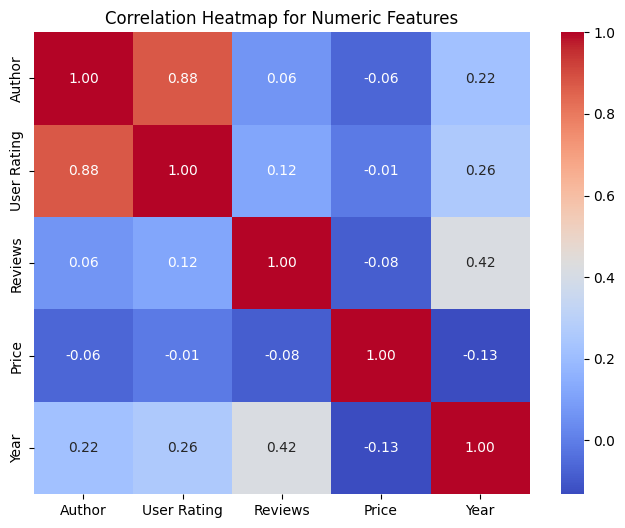

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = filtered_dataset.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [ ]:
x=filtered_dataset.iloc[:,[0,2,3,4,5]].values
print(x)

[[4.625003909739867 17350 8.0 2016 'Non Fiction']
 [4.598872289954464 2052 22.0 2011 'Fiction']
 [4.625003909739867 18979 15.0 2018 'Non Fiction']
 ...
 [4.638014757176166 21625 9.0 2017 'Fiction']
 [4.6602917009717215 9413 8.0 2019 'Fiction']
 [4.625003909739867 14331 8.0 2019 'Non Fiction']]


In [ ]:
y=filtered_dataset.iloc[:,[1]].values
print(y)

[[4.7       ]
 [4.6       ]
 [4.7       ]
 [4.7       ]
 [4.8       ]
 [4.4       ]
 [4.7       ]
 [4.7       ]
 [4.7       ]
 [4.6       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.4       ]
 [4.5       ]
 [4.8       ]
 [3.9       ]
 [4.6       ]
 [4.3       ]
 [4.6       ]
 [4.7       ]
 [4.2       ]
 [4.6       ]
 [4.6       ]
 [4.8       ]
 [4.7       ]
 [4.8       ]
 [4.7       ]
 [4.7       ]
 [4.6       ]
 [4.5       ]
 [4.9       ]
 [4.6       ]
 [4.8       ]
 [4.5       ]
 [4.7       ]
 [4.7       ]
 [4.7       ]
 [4.3       ]
 [4.8       ]
 [4.8       ]
 [4.6       ]
 [4.8       ]
 [4.4       ]
 [4.6       ]
 [4.2       ]
 [4.3       ]
 [4.8       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.8       ]
 [4.8       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.7       ]
 [4.8       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.8       ]
 [4.6       ]
 [4.5       ]
 [4.5       ]
 [4.3 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 4.625003909739867 17350 8.0 2016]
 [1.0 0.0 4.598872289954464 2052 22.0 2011]
 [0.0 1.0 4.625003909739867 18979 15.0 2018]
 ...
 [1.0 0.0 4.638014757176166 21625 9.0 2017]
 [1.0 0.0 4.6602917009717215 9413 8.0 2019]
 [0.0 1.0 4.625003909739867 14331 8.0 2019]]


avoid dummy variable

In [ ]:
x= x[: , 1:]
print(x)

[[1.0 4.625003909739867 17350 8.0 2016]
 [0.0 4.598872289954464 2052 22.0 2011]
 [1.0 4.625003909739867 18979 15.0 2018]
 ...
 [0.0 4.638014757176166 21625 9.0 2017]
 [0.0 4.6602917009717215 9413 8.0 2019]
 [1.0 4.625003909739867 14331 8.0 2019]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard scale all columns of x except the first two columns
scaler = StandardScaler()
x[:, 2:] = scaler.fit_transform(x[:, 2:])
print(x)

[[1.0 4.625003909739867 1.70775556992414 -0.5290973817760144
  0.5898726211623734]
 [0.0 4.598872289954464 -0.9433410949933759 0.8457445041893393
  -0.8731972659726498]
 [1.0 4.625003909739867 1.9900562933618857 0.1583235612066625
  1.1751005760163826]
 ...
 [0.0 4.638014757176166 2.448600009885075 -0.43089438992134627
  0.882486598589378]
 [0.0 4.6602917009717215 0.33229771729959273 -0.5290973817760144
  1.4677145534433873]
 [1.0 4.625003909739867 1.184572092908453 -0.5290973817760144
  1.4677145534433873]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = regressor.predict(x_test)

# Calculate the R^2 score (accuracy for regression)
accuracy = r2_score(y_test, y_pred)
print("R^2 Score (Accuracy):", accuracy)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score (Accuracy): 0.8872769168391178
Mean Absolute Error: 0.0518
Mean Squared Error: 0.0060


In [ ]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    median_absolute_error,
    explained_variance_score
)

# Predict on the test set to match y_test
y_pred_test = regressor.predict(x_test)

print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}")
# Compute RMSE manually for compatibility
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Log Error: {mean_squared_log_error(y_test, y_pred_test):.4f}")
print(f"Median Absolute Error: {median_absolute_error(y_test, y_pred_test):.4f}")
print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred_test):.4f}")

R² Score: 0.8873
Mean Absolute Error: 0.0518
Mean Squared Error: 0.0060
Root Mean Squared Error: 0.0777
Mean Squared Log Error: 0.0002
Median Absolute Error: 0.0282
Explained Variance Score: 0.8922


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.7918 ± 0.0882


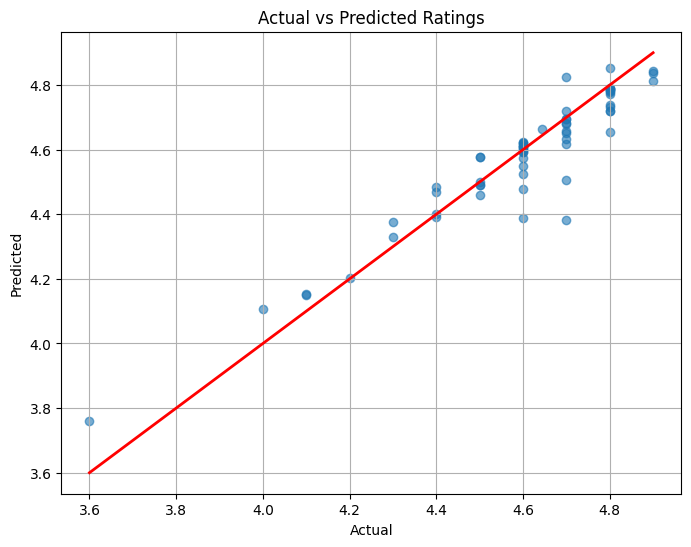

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = regressor.predict(x_train)

# Calculate the R^2 score (accuracy for regression)
accuracy = r2_score(y_train, y_pred)
print("R^2 Score (Accuracy):", accuracy)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score (Accuracy): 0.744058455333455
Mean Absolute Error: 0.0547
Mean Squared Error: 0.0116


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.7918 ± 0.0882


In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(regressor, x, y, scoring='r2', cv=cv)
print(scores.mean())

0.7881559523299546


In [ ]:
print("Shape of x:", x.shape)

Shape of x: (315, 5)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Initialize and fit the SVR model (using default RBF kernel)
svr = SVR()
svr.fit(x_train, y_train.ravel())

# Predict on test and train sets
y_pred_test_svr = svr.predict(x_test)
y_pred_train_svr = svr.predict(x_train)

# Calculate R^2 scores
test_r2_svr = r2_score(y_test, y_pred_test_svr)
train_r2_svr = r2_score(y_train, y_pred_train_svr)
print(f"SVR Test set R^2 Score: {test_r2_svr:.4f}")
print(f"SVR Train set R^2 Score: {train_r2_svr:.4f}")

# Cross-validation (CV=5)
cv_scores_svr = cross_val_score(svr, x, y.ravel(), cv=5, scoring='r2')
print(f"SVR Cross-Validated R^2: {cv_scores_svr.mean():.4f} ± {cv_scores_svr.std():.4f}")

SVR Test set R^2 Score: 0.0040
SVR Train set R^2 Score: 0.1921
SVR Cross-Validated R^2: 0.0927 ± 0.0537


In [ ]:
ones=np.ones((315,1)).astype(int)
x=np.append(ones,x,axis=1)

In [ ]:
print(x)

[[1 1.0 4.625003909739867 1.70775556992414 -0.5290973817760144
  0.5898726211623734]
 [1 0.0 4.598872289954464 -0.9433410949933759 0.8457445041893393
  -0.8731972659726498]
 [1 1.0 4.625003909739867 1.9900562933618857 0.1583235612066625
  1.1751005760163826]
 ...
 [1 0.0 4.638014757176166 2.448600009885075 -0.43089438992134627
  0.882486598589378]
 [1 0.0 4.6602917009717215 0.33229771729959273 -0.5290973817760144
  1.4677145534433873]
 [1 1.0 4.625003909739867 1.184572092908453 -0.5290973817760144
  1.4677145534433873]]


In [ ]:
x_opt=x[:,:]
x_opt=x_opt.astype(np.float64)
print(x_opt)

[[ 1.          1.          4.62500391  1.70775557 -0.52909738  0.58987262]
 [ 1.          0.          4.59887229 -0.94334109  0.8457445  -0.87319727]
 [ 1.          1.          4.62500391  1.99005629  0.15832356  1.17510058]
 ...
 [ 1.          0.          4.63801476  2.44860001 -0.43089439  0.8824866 ]
 [ 1.          0.          4.6602917   0.33229772 -0.52909738  1.46771455]
 [ 1.          1.          4.62500391  1.18457209 -0.52909738  1.46771455]]


In [ ]:
import statsmodels.api as sm
regressor_OLS=sm.OLS(y,x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           6.34e-99
Time:                        21:34:27   Log-Likelihood:                 271.87
No. Observations:                 315   AIC:                            -531.7
Df Residuals:                     309   BIC:                            -509.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.2423      0.989    -26.531      0.000     -28.189     -24.296
x1             0.0210      0.013      1.643      0.101      -0.004       0.046
x2             6.6831      0.214     31.229      0.000       6.262       7.104
x3             0.0129      0.007      1.893      0.059      -0.001       0.026
x4             0.0118      0.006      2.012      0.045       0.000       0.023
x5             0.0099      0.007      1.455      0.147      -0.003       0.023
==============================================================================
Omnibus:                      363.456   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49094.068
Skew:                          -4.655   Prob(JB):                         0.00
Kurtosis:                      63.447   Cond. No.                         829.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in x_opt (excluding the intercept column)
vif_data = []
for i in range(1, x_opt.shape[1]):  # skip the intercept at index 0
    vif = variance_inflation_factor(x_opt, i)
    vif_data.append((i, vif))

print("Variance Inflation Factors (VIF):")
for idx, vif in vif_data:
    print(f"Feature {idx}: VIF = {vif:.2f}")

Variance Inflation Factors (VIF):
Feature 1: VIF = 1.17
Feature 2: VIF = 1.09
Feature 3: VIF = 1.37
Feature 4: VIF = 1.02
Feature 5: VIF = 1.38


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Initialize and fit the SVR model (using default RBF kernel)
svr = SVR()
svr.fit(x_train, y_train.ravel())

# Predict on test and train sets
y_pred_test_svr = svr.predict(x_test)
y_pred_train_svr = svr.predict(x_train)

# Calculate R^2 scores
test_r2_svr = r2_score(y_test, y_pred_test_svr)
train_r2_svr = r2_score(y_train, y_pred_train_svr)
print(f"SVR Test set R^2 Score: {test_r2_svr:.4f}")
print(f"SVR Train set R^2 Score: {train_r2_svr:.4f}")

# Cross-validation (CV=5)
cv_scores_svr = cross_val_score(svr, x, y.ravel(), cv=5, scoring='r2')
print(f"SVR Cross-Validated R^2: {cv_scores_svr.mean():.4f} ± {cv_scores_svr.std():.4f}")

SVR Test set R^2 Score: 0.0040


SVR Train set R^2 Score: 0.1921
SVR Cross-Validated R^2: 0.0928 ± 0.0538


# Optimized SVR Model with Hyperparameter Tuning

Now let's optimize the SVR model using GridSearchCV to find the best hyperparameters and also apply proper feature scaling.

In [ ]:
# First, let's prepare properly scaled features for SVR (SVR is sensitive to feature scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Remove the manually added ones column for proper scaling
x_clean = x[:, 1:]  # Remove the ones column we added earlier
print(f"Shape after removing ones column: {x_clean.shape}")

# Split the data first
x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(
    x_clean, y, test_size=0.2, random_state=1
)

# Apply feature scaling
scaler_svr = StandardScaler()
x_train_scaled = scaler_svr.fit_transform(x_train_clean)
x_test_scaled = scaler_svr.transform(x_test_clean)

print(f"Training set shape: {x_train_scaled.shape}")
print(f"Test set shape: {x_test_scaled.shape}")

Shape after removing ones column: (315, 5)
Training set shape: (252, 5)
Test set shape: (63, 5)


In [ ]:
# Hyperparameter tuning for SVR using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import time

# Define hyperparameter grid for SVR
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

print("Starting hyperparameter tuning for SVR...")
start_time = time.time()

# Initialize GridSearchCV
svr_grid = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
svr_grid.fit(x_train_scaled, y_train_clean.ravel())

end_time = time.time()
print(f"Grid search completed in {end_time - start_time:.2f} seconds")
print(f"Best parameters: {svr_grid.best_params_}")
print(f"Best cross-validation score: {svr_grid.best_score_:.4f}")

Starting hyperparameter tuning for SVR...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Grid search completed in 483.82 seconds
Best parameters: {'C': 1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.8016


In [ ]:
# Evaluate the optimized SVR model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Get the best SVR model
best_svr = svr_grid.best_estimator_

# Make predictions
y_pred_test_optimized = best_svr.predict(x_test_scaled)
y_pred_train_optimized = best_svr.predict(x_train_scaled)

# Calculate performance metrics
test_r2_optimized = r2_score(y_test_clean, y_pred_test_optimized)
train_r2_optimized = r2_score(y_train_clean, y_pred_train_optimized)
test_mae_optimized = mean_absolute_error(y_test_clean, y_pred_test_optimized)
test_rmse_optimized = np.sqrt(mean_squared_error(y_test_clean, y_pred_test_optimized))

print("=== Optimized SVR Performance ===")
print(f"Test R² Score: {test_r2_optimized:.4f}")
print(f"Train R² Score: {train_r2_optimized:.4f}")
print(f"Test MAE: {test_mae_optimized:.4f}")
print(f"Test RMSE: {test_rmse_optimized:.4f}")

# Cross-validation with optimized model
from sklearn.model_selection import cross_val_score
x_scaled_full = scaler_svr.fit_transform(x_clean)
cv_scores_optimized = cross_val_score(best_svr, x_scaled_full, y.ravel(), cv=5, scoring='r2')
print(f"Optimized SVR Cross-Validated R²: {cv_scores_optimized.mean():.4f} ± {cv_scores_optimized.std():.4f}")

# Compare with previous SVR results
print("\n=== Performance Comparison ===")
print(f"Original SVR Test R²: {test_r2_svr:.4f}")
print(f"Optimized SVR Test R²: {test_r2_optimized:.4f}")
print(f"Improvement: {test_r2_optimized - test_r2_svr:.4f}")
print(f"Original SVR CV R²: {cv_scores_svr.mean():.4f}")
print(f"Optimized SVR CV R²: {cv_scores_optimized.mean():.4f}")

=== Optimized SVR Performance ===
Test R² Score: 0.7719
Train R² Score: 0.7956
Test MAE: 0.0475
Test RMSE: 0.1105
Optimized SVR Cross-Validated R²: 0.7906 ± 0.0902

=== Performance Comparison ===
Original SVR Test R²: 0.0040
Optimized SVR Test R²: 0.7719
Improvement: 0.7679
Original SVR CV R²: 0.0928
Optimized SVR CV R²: 0.7906


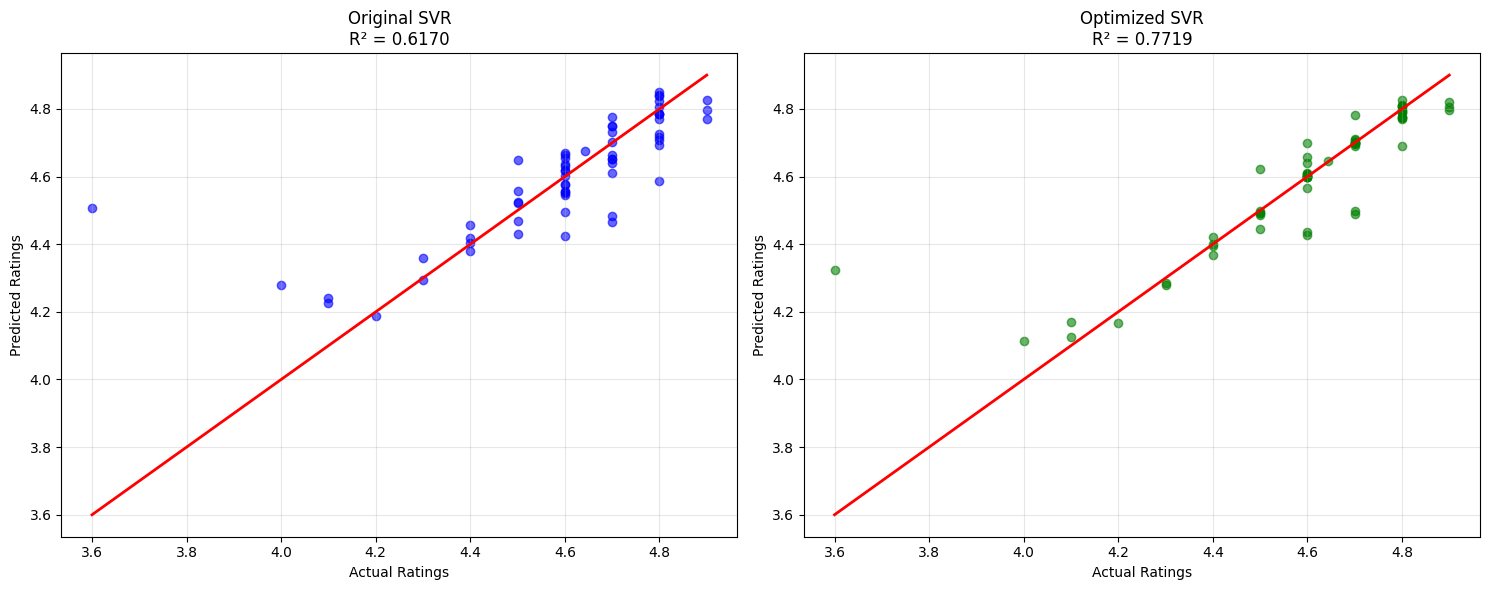

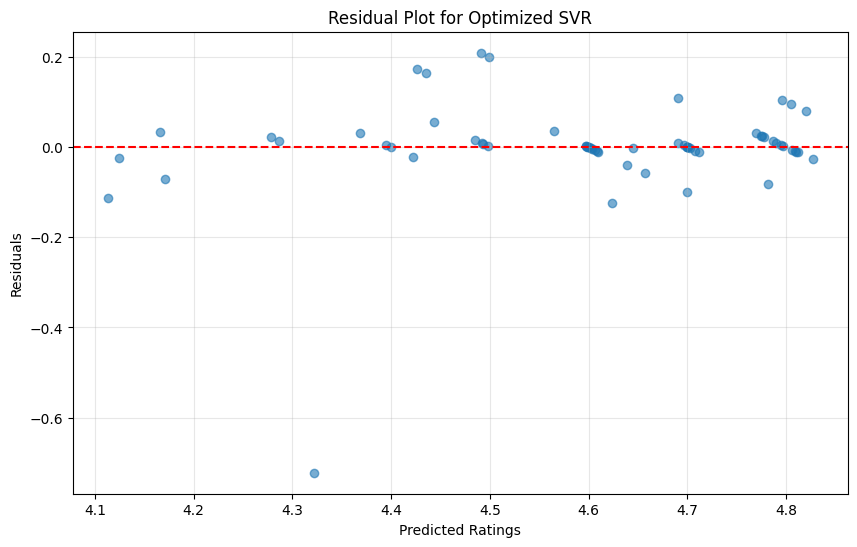

In [ ]:
# Visualization: Compare original vs optimized SVR predictions
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original SVR predictions (need to get them on scaled data)
svr_original = SVR()  # Using default parameters
svr_original.fit(x_train_scaled, y_train_clean.ravel())
y_pred_test_original = svr_original.predict(x_test_scaled)

# Plot 1: Original SVR
ax1.scatter(y_test_clean, y_pred_test_original, alpha=0.6, color='blue')
ax1.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r', lw=2)
ax1.set_xlabel('Actual Ratings')
ax1.set_ylabel('Predicted Ratings')
ax1.set_title(f'Original SVR\nR² = {r2_score(y_test_clean, y_pred_test_original):.4f}')
ax1.grid(True, alpha=0.3)

# Plot 2: Optimized SVR
ax2.scatter(y_test_clean, y_pred_test_optimized, alpha=0.6, color='green')
ax2.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r', lw=2)
ax2.set_xlabel('Actual Ratings')
ax2.set_ylabel('Predicted Ratings')
ax2.set_title(f'Optimized SVR\nR² = {test_r2_optimized:.4f}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot residuals for optimized model
plt.figure(figsize=(10, 6))
residuals_optimized = y_test_clean.ravel() - y_pred_test_optimized
plt.scatter(y_pred_test_optimized, residuals_optimized, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot for Optimized SVR')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Alternative optimization: RandomizedSearchCV for faster hyperparameter search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
import numpy as np

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': loguniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(loguniform(0.001, 1).rvs(8)),
    'epsilon': uniform(0.01, 0.5)
}

print("Starting RandomizedSearchCV for SVR optimization...")
start_time = time.time()

# Initialize RandomizedSearchCV
svr_random = RandomizedSearchCV(
    SVR(),
    param_distributions,
    n_iter=50,  # Number of parameter combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the randomized search
svr_random.fit(x_train_scaled, y_train_clean.ravel())

end_time = time.time()
print(f"Randomized search completed in {end_time - start_time:.2f} seconds")
print(f"Best parameters (Random): {svr_random.best_params_}")
print(f"Best cross-validation score (Random): {svr_random.best_score_:.4f}")

# Compare with GridSearchCV results
print(f"\nGridSearchCV best score: {svr_grid.best_score_:.4f}")
print(f"RandomizedSearchCV best score: {svr_random.best_score_:.4f}")

Starting RandomizedSearchCV for SVR optimization...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Randomized search completed in 8.55 seconds
Best parameters (Random): {'C': np.float64(1.7104525858990531), 'epsilon': np.float64(0.026525366450274195), 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score (Random): 0.7757

GridSearchCV best score: 0.8016
RandomizedSearchCV best score: 0.7757


In [ ]:
# Final model evaluation and summary
print("=== FINAL SVR OPTIMIZATION SUMMARY ===")
print("\nModel Performance Comparison:")
print("-" * 50)

# Original SVR (default parameters)
svr_default = SVR()
svr_default.fit(x_train_scaled, y_train_clean.ravel())
y_pred_default = svr_default.predict(x_test_scaled)
r2_default = r2_score(y_test_clean, y_pred_default)

# Best models from grid search and random search
best_grid_model = svr_grid.best_estimator_
best_random_model = svr_random.best_estimator_

y_pred_grid = best_grid_model.predict(x_test_scaled)
y_pred_random = best_random_model.predict(x_test_scaled)

r2_grid = r2_score(y_test_clean, y_pred_grid)
r2_random = r2_score(y_test_clean, y_pred_random)

print(f"1. Default SVR:           R² = {r2_default:.4f}")
print(f"2. GridSearchCV SVR:      R² = {r2_grid:.4f}")
print(f"3. RandomizedSearchCV:    R² = {r2_random:.4f}")

# Determine the best model
models_comparison = {
    'Default SVR': (svr_default, r2_default),
    'GridSearch SVR': (best_grid_model, r2_grid),
    'RandomSearch SVR': (best_random_model, r2_random)
}

best_model_name = max(models_comparison.keys(), key=lambda k: models_comparison[k][1])
best_model, best_r2 = models_comparison[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name} with R² = {best_r2:.4f}")
print(f"Best model parameters: {best_model.get_params()}")

# Calculate improvement over original
original_svr_r2 = test_r2_svr  # From the original SVR cell
improvement = best_r2 - original_svr_r2
improvement_percent = (improvement / abs(original_svr_r2)) * 100

print(f"\nImprovement over original SVR:")
print(f"Original R²: {original_svr_r2:.4f}")
print(f"Best R²: {best_r2:.4f}")
print(f"Absolute improvement: {improvement:.4f}")
print(f"Percentage improvement: {improvement_percent:.2f}%")

=== FINAL SVR OPTIMIZATION SUMMARY ===

Model Performance Comparison:
--------------------------------------------------
1. Default SVR:           R² = 0.6170
2. GridSearchCV SVR:      R² = 0.7719
3. RandomizedSearchCV:    R² = 0.6641

🏆 BEST MODEL: GridSearch SVR with R² = 0.7719
Best model parameters: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Improvement over original SVR:
Original R²: 0.0040
Best R²: 0.7719
Absolute improvement: 0.7679
Percentage improvement: 19360.85%


In [ ]:
from sklearn.svm import SVR

# Create SVR model with specified parameters
svr_custom = SVR(
    C=1,
    cache_size=200,
    coef0=0.0,
    degree=3,
    epsilon=0.01,
    gamma=0.1,
    kernel='rbf',
    max_iter=-1,
    shrinking=True,
    tol=0.001,
    verbose=False
)

# Fit the model to the scaled training data
svr_custom.fit(x_train_scaled, y_train.ravel())

# Predict on the training and test sets
y_pred_train_custom = svr_custom.predict(x_train_scaled)
y_pred_test_custom = svr_custom.predict(x_test_scaled)

print("Custom SVR model fitted and predictions made.")